Trading SUI-USDt
Indicator : SPY's RSI (rsi)

Sell if rsi > OVERBOUGHT (80)
Buy if rsi <> OVERSOLD (20)

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TICKER = "SUI20947-USD"
# TICKER = ""
LOOKBACK = 10000
WINDOW = 14
OVERBOUGHT = 70
OVERSOLD = 30

In [3]:
def get_data(TICKER,LOOKBACK):
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)
    df = df.iloc[-LOOKBACK:,:]
    return df.dropna()

SPY = get_data('SPY',LOOKBACK)
SUI = get_data(TICKER,LOOKBACK)
SUI

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2023-05-03,1.403141,4.519279,1.232650,4.519078,1468656004
2023-05-04,1.329752,1.503840,1.303242,1.403849,944139701
2023-05-05,1.306098,1.371784,1.264142,1.329863,652934731
2023-05-06,1.333112,1.375155,1.282992,1.306368,547853943
2023-05-07,1.240903,1.346549,1.240254,1.333028,268893608
...,...,...,...,...,...
2025-08-16,3.776746,3.779617,3.673838,3.711067,657785218
2025-08-17,3.763398,3.893936,3.746054,3.776901,847741002
2025-08-18,3.602517,3.776444,3.527675,3.763406,1504471510


Adding The RSI of SPY to SUI

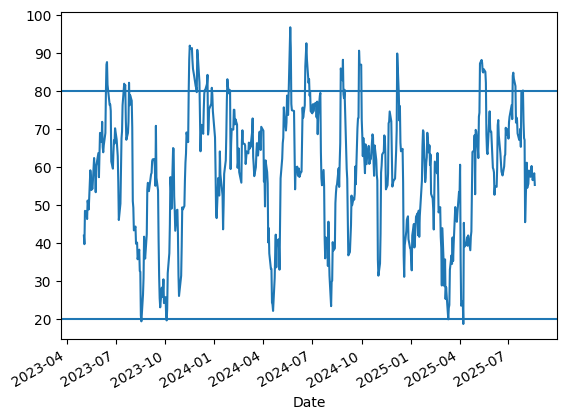

In [4]:
def add_RSI(df,comp,WINDOW=WINDOW):
    df['Loss'] = np.where(df['Close'].diff()<0,-df['Close'].diff(),0)
    df['Gain'] = np.where(df['Close'].diff()>0,df['Close'].diff(),0)
    df['avgLoss'] = df['Loss'].rolling(WINDOW).mean()
    df['avgGain'] = df['Gain'].rolling(WINDOW).mean()
    rs = df['avgGain']/df['avgLoss']
    rsi = 100 - (100/(1+rs))
    
    comp[f"SPY's RSI"] = rsi
    return comp
    
SUI = add_RSI(SPY,SUI)
SUI = SUI.dropna()
SUI["SPY's RSI"].plot()
plt.axhline(80)
plt.axhline(20)

Testing the Strategy, Sell if SPY's RSI is OVERBOUGHT, Buy if OVERSOLD

In [5]:
SUI['Strategy'] = np.where(SUI["SPY's RSI"]>OVERBOUGHT,-1,np.where(SUI["SPY's RSI"]<OVERSOLD,1,0))
SUI['Strategy'] = SUI['Strategy'].shift(1)
SUI['Strategy'].plot
SUI = SUI.dropna()
SUI

/var/folders/g2/w97jtd5d01xbns5qzn2j5k0c0000gn/T/ipykernel_10705/3924009169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SUI['Strategy'] = np.where(SUI["SPY's RSI"]>OVERBOUGHT,-1,np.where(SUI["SPY's RSI"]<OVERSOLD,1,0))
/var/folders/g2/w97jtd5d01xbns5qzn2j5k0c0000gn/T/ipykernel_10705/3924009169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SUI['Strategy'] = SUI['Strategy'].shift(1)


Price,Close,High,Low,Open,Volume,SPY's RSI,Strategy
Date,,,,,,,
2023-05-04,1.329752,1.503840,1.303242,1.403849,944139701,39.667364,0.0
2023-05-05,1.306098,1.371784,1.264142,1.329863,652934731,48.421325,0.0
2023-05-08,1.141459,1.245059,1.032753,1.240079,531156825,48.221652,0.0
2023-05-09,1.187172,1.211612,1.097481,1.140494,438518326,46.273450,0.0
2023-05-10,1.180974,1.235136,1.125329,1.186800,717935525,51.135017,0.0
...,...,...,...,...,...,...,...
2025-08-13,4.008974,4.067581,3.817945,3.879349,2133738204,60.222615,0.0
2025-08-14,3.758694,4.174920,3.659139,4.008963,2651337432,58.077807,0.0
2025-08-15,3.711073,3.881069,3.625496,3.758694,1499296571,56.507785,0.0


,SUI Cumulative Return,SPY RSI Strategy Return
Date,,
2023-05-04,NaN,NaN
2023-05-05,-0.017788,0.000000
2023-05-08,-0.141600,0.000000
2023-05-09,-0.107223,0.000000
2023-05-10,-0.111884,0.000000
...,...,...
2025-08-13,2.014828,-0.742126
2025-08-14,1.826613,-0.742126
2025-08-15,1.790801,-0.742126


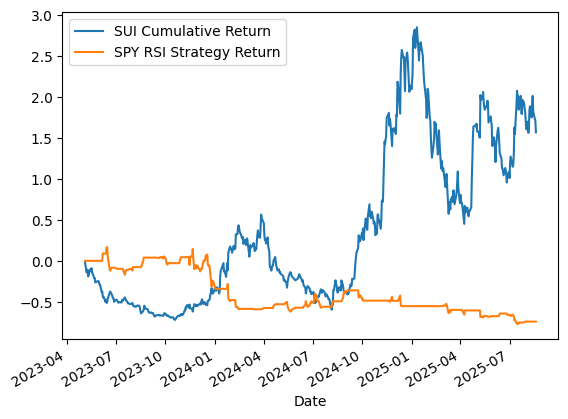

In [6]:
delta = SUI['Close'].pct_change()
SUI['Asset Cum'] = np.cumprod(1+delta)-1
SUI['Strat Cum'] = np.cumprod(1+delta*SUI['Strategy'])-1

data = pd.DataFrame({
    "SUI Cumulative Return" : SUI['Asset Cum'],
    "SPY RSI Strategy Return" : SUI['Strat Cum'],
    
    })

data.plot()
data
